# Linear Regression

-  y = a+bX +b1 X1 + b2 X2+....
-  y=> dependent(target)   (1) [1D]
-  x=> independent(feature)  (n) [2D]


In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics  import r2_score,mean_absolute_error,mean_squared_error

In [2]:
#independent
time=np.array([5,7,12,16,20]).reshape(-1,1)

In [3]:
# dependent
mass=np.array([40,120,180,210,240])

In [4]:
mymodel=LinearRegression() #creating linear recgrission
#MYmodel traning part is .fit(ind,dep)
mymodel.fit(time,mass)

LinearRegression()

In [5]:
x=int(input("enter the time in minutes :"))
result=mymodel.predict([[x]])#passing ind value  (time in 2D) # predict the output
print("if the time is ",x,"minutes the mass is ",result[0],"grams")

enter the time in minutes : 13


if the time is  13 minutes the mass is  170.2077922077922 grams


LinearRegression for large data

In [6]:
mass_model=mymodel.predict(time)
print(mass_model)

[ 72.54545455  96.96103896 158.         206.83116883 255.66233766]


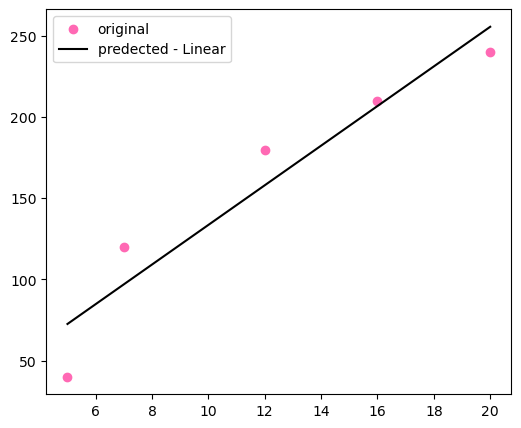

In [7]:
# plit the scatter graph for the original values 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(time,mass,label="original",color='hotpink')
#plotting the line graph for model values
plt.plot(time,mass_model,label='predected - Linear',color='k')
plt.legend()
plt.show()

# Evalution:

R-Square
- Larger,the better

In [8]:
r2score=r2_score(time,mass_model)
print(r2score)

-816.6925282509699


MSE
- lower the better

In [9]:
mse=mean_squared_error(time,mass_model)
print(mse)

25184.929870129872


MAE 
- lower the better

In [10]:
mae=mean_absolute_error(time,mass_model)
print(mae)

146.0


In [ ]:
csae study : predict the salary ,age ,exprience, gender,education

# Salary_EDA

- importing libraries
- load the data
- clean the data(null,duplicates)
- processing(encoding,scalling)
- split data
- create and train model 
- test and model
- evaluation

# importing libraries

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

# loading data

In [12]:
df=pd.read_csv(r"C:\Users\Bhoomika.G\OneDrive\Documents\Salary_EDA.csv")

In [13]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


# clean the data

In [14]:
df.isnull().sum()

Age                    2
Gender                 4
Education Level        3
Job Title              5
Years of Experience    2
Salary                 3
dtype: int64

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# Data preprocessing

In [16]:
#encoding gender
ge=LabelEncoder()
df['gender_encoder']=ge.fit_transform(df['Gender'])
#encoder education level
ge1=LabelEncoder()
df['Education Level_encoder']=ge1.fit_transform(df['Education Level'])
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,gender_encoder,Education Level_encoder
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0


# split the data(ind,dep)

In [17]:
x = df[['Age','gender_encoder','Education Level_encoder','Years of Experience']]
y=df['Salary']


# split the train and test

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#total 700 record
# X_train 560(age,ge,e)
#X_test   140(age,ge,e)
#y_train
#y_test

# creating the model

In [36]:
sal_model= LinearRegression()
sal_model.fit(x_train,y_train)

LinearRegression()

# Test

In [38]:
a=int(input("enter the your age :"))
g_user=input("enter the gendre")
ed_user=input("enter the educaltion level")
exp=int(input("enter the exprience: "))

enter the your age : 21
enter the gendre Male
enter the educaltion level PhD
enter the exprience:  8


In [41]:
gen_enc=ge.transform([g_user])[0]
edu_enc=ge1.transform([ed_user])[0]
print(gen_enc,edu_enc)

1 2


In [42]:
result=sal_model.predict([[a,gen_enc,edu_enc,exp]]) 
print(result)

[72792.44267375]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Evalution:
- predict test value
- visulaize
- matrics

In [49]:
model_prediction=sal_model.predict(x_test)

In [50]:
len(y_test)

74

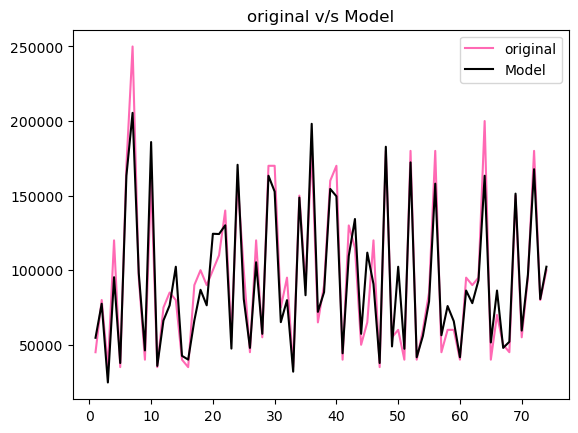

In [54]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,75),y_test,label="original",color='hotpink')
#plotting the line graph for model values
plt.plot(np.arange(1,75),model_prediction,label='Model',color='k')
plt.title('original v/s Model')
plt.legend()
plt.show()

In [58]:
r2score=r2_score(y_test,model_prediction)  #
print(r2score)
if r2score >0.5:
    print("model is good fit")
else:
    print("mode id not good fit")

0.9084658302523619
model is good fit


# MSE

In [52]:
mse=mean_squared_error(y_test,model_prediction)
print(mse)

235720545.72027335


# MAE

In [53]:
mae=mean_absolute_error(y_test,model_prediction)
print(mae)

11362.212304880708
